# Dodatkowy, wybrany eksperyment oceniający użyteczność jednej z następujących technik regularyzacji uczenia:
**Dropout**, Batch Normalization, Augmentacja danych

In [7]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [8]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [9]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "dropout_rate"
for dropout_rate in [0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.95]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dropout(rate=dropout_rate),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    all_titles.append(dropout_rate)
all_descriptions

[0    n          type filters kernel_size activation pool_size strides units
 1    0   KerasTensor                                                       
 2    1        Conv2D      16      (3, 3)       relu                        
 3    2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4    3        Conv2D      32      (3, 3)       relu                        
 5    4  MaxPooling2D                                   (2, 2)  (1, 1)      
 6    5        Conv2D      64      (3, 3)       relu                        
 7    6  MaxPooling2D                                   (2, 2)  (1, 1)      
 8    7        Conv2D     128      (3, 3)       relu                        
 9    8  MaxPooling2D                                   (2, 2)  (1, 1)      
 10   9       Flatten                                                       
 11  10       Dropout                                                       
 12  11         Dense                                                     10

In [10]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [11]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 108s 230ms/step - loss: 0.1619 - accuracy: 0.9527 - val_loss: 0.0630 - val_accuracy: 0.9811
Epoch 2/5
469/469 [==============================] - 107s 228ms/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 3/5
469/469 [==============================] - 94s 200ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0295 - val_accuracy: 0.9904
Epoch 4/5
469/469 [==============================] - 85s 181ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0273 - val_accuracy: 0.9907
Epoch 5/5
469/469 [==============================] - 85s 180ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.0270 - val_accuracy: 0.9929


 14%|█▍        | 1/7 [07:58<47:53, 478.95s/it]

Epoch 1/5
469/469 [==============================] - 92s 196ms/step - loss: 0.1527 - accuracy: 0.9539 - val_loss: 0.0620 - val_accuracy: 0.9826
Epoch 2/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 3/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 4/5
469/469 [==============================] - 92s 195ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 5/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0293 - val_accuracy: 0.9915


 29%|██▊       | 2/7 [15:38<38:57, 467.46s/it]

Epoch 1/5
469/469 [==============================] - 93s 198ms/step - loss: 0.1433 - accuracy: 0.9557 - val_loss: 0.0419 - val_accuracy: 0.9861
Epoch 2/5
469/469 [==============================] - 92s 197ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 3/5
469/469 [==============================] - 92s 197ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.0289 - val_accuracy: 0.9911
Epoch 4/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 5/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0359 - val_accuracy: 0.9889


 43%|████▎     | 3/7 [23:20<31:00, 465.11s/it]

Epoch 1/5
469/469 [==============================] - 93s 197ms/step - loss: 0.1555 - accuracy: 0.9520 - val_loss: 0.0448 - val_accuracy: 0.9850
Epoch 2/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0452 - accuracy: 0.9866 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 3/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 4/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 5/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0300 - val_accuracy: 0.9916


 57%|█████▋    | 4/7 [31:01<23:10, 463.37s/it]

Epoch 1/5
469/469 [==============================] - 93s 196ms/step - loss: 0.1682 - accuracy: 0.9490 - val_loss: 0.0662 - val_accuracy: 0.9803
Epoch 2/5
469/469 [==============================] - 92s 195ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 3/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0275 - val_accuracy: 0.9908
Epoch 4/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 5/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0290 - val_accuracy: 0.9905


 71%|███████▏  | 5/7 [38:41<15:24, 462.14s/it]

Epoch 1/5
469/469 [==============================] - 93s 196ms/step - loss: 0.1748 - accuracy: 0.9462 - val_loss: 0.1534 - val_accuracy: 0.9552
Epoch 2/5
469/469 [==============================] - 91s 194ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0306 - val_accuracy: 0.9894
Epoch 3/5
469/469 [==============================] - 91s 195ms/step - loss: 0.0454 - accuracy: 0.9868 - val_loss: 0.0405 - val_accuracy: 0.9874
Epoch 4/5
469/469 [==============================] - 91s 194ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 5/5
469/469 [==============================] - 91s 194ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0344 - val_accuracy: 0.9905


 86%|████████▌ | 6/7 [46:18<07:40, 460.45s/it]

Epoch 1/5
469/469 [==============================] - 91s 193ms/step - loss: 0.2441 - accuracy: 0.9225 - val_loss: 0.0617 - val_accuracy: 0.9806
Epoch 2/5
469/469 [==============================] - 89s 189ms/step - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.0432 - val_accuracy: 0.9856
Epoch 3/5
469/469 [==============================] - 89s 190ms/step - loss: 0.0734 - accuracy: 0.9778 - val_loss: 0.0366 - val_accuracy: 0.9872
Epoch 4/5
469/469 [==============================] - 91s 195ms/step - loss: 0.0658 - accuracy: 0.9804 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 5/5
469/469 [==============================] - 91s 194ms/step - loss: 0.0606 - accuracy: 0.9820 - val_loss: 0.0383 - val_accuracy: 0.9878


100%|██████████| 7/7 [53:49<00:00, 461.34s/it]


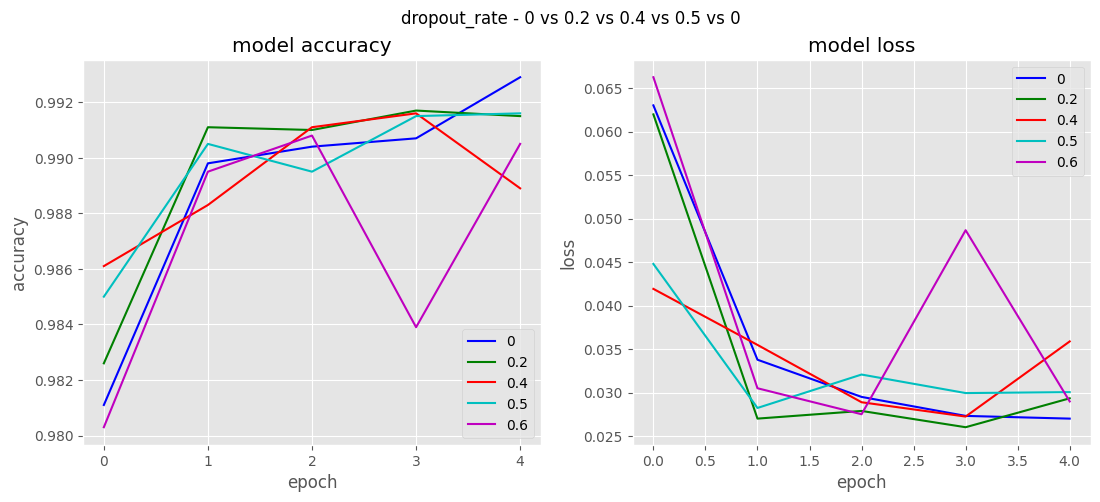

In [15]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles[:-2]])
set_plt(all_history[:-2], all_titles[:-2], all_title[:-2])
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)